# Вариант 3. Дата сет - 7

In [27]:
import numpy as np
import pandas as pd
# import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [28]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# os.listdir()

# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('restaurant-scores-lives-standard.csv', sep=",", engine='python')

In [29]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,1977,BURMA SUPERSTAR RESTAURANT,309 CLEMENT St,San Francisco,CA,94118,37.783004,-122.462539,"{'human_address': '{""address"":"""",""city"":"""",""st...",NaN,1977_20160328,2016-03-28T00:00:00,87.0,Routine - Unscheduled,1977_20160328_103105,Improper cooling methods,High Risk
1,1977,BURMA SUPERSTAR RESTAURANT,309 CLEMENT St,San Francisco,CA,94118,37.783004,-122.462539,"{'human_address': '{""address"":"""",""city"":"""",""st...",NaN,1977_20160328,2016-03-28T00:00:00,87.0,Routine - Unscheduled,1977_20160328_103145,Improper storage of equipment utensils or linens,Low Risk
2,3029,TENNESSEE GRILL INC,1128 TARAVAL St,San Francisco,CA,94116,37.742957,-122.478332,"{'human_address': '{""address"":"""",""city"":"""",""st...",NaN,3029_20160328,2016-03-28T00:00:00,NaN,Reinspection/Followup,NaN,NaN,NaN
3,1977,BURMA SUPERSTAR RESTAURANT,309 CLEMENT St,San Francisco,CA,94118,37.783004,-122.462539,"{'human_address': '{""address"":"""",""city"":"""",""st...",NaN,1977_20160328,2016-03-28T00:00:00,87.0,Routine - Unscheduled,1977_20160328_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
4,69294,We Sushi,428 11th,San Francisco,CA,NaN,37.770613,-122.412191,"{'human_address': '{""address"":"""",""city"":"""",""st...",NaN,69294_20160328,2016-03-28T00:00:00,83.0,Routine - Unscheduled,69294_20160328_103149,Wiping cloths not clean or properly stored or ...,Low Risk


# Масштабирование одного из признаков
В качесте признака выбран - 'inspection_score' (Оценка инспекции)

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer


/home/antony/PycharmProjects/ML_MGTU/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/antony/PycharmProjects/ML_MGTU/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


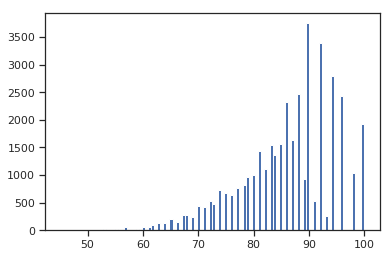

In [30]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['inspection_score']])
plt.hist(data['inspection_score'], 100)
plt.show()

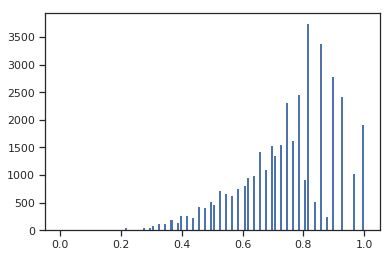

In [14]:
plt.hist(sc1_data, 100)
plt.show()

# Преобразование категориальных признаков 

## label encoding

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
data_new = data.fillna(value={'risk_category': 'no'})

In [18]:
data_new['risk_category'].unique()

array(['High Risk', 'Low Risk', 'no', 'Moderate Risk'], dtype=object)

In [19]:
le = LabelEncoder()
data_new_1 = le.fit_transform(data_new['risk_category'])

In [20]:
np.unique(data_new_1)

array([0, 1, 2, 3])

In [21]:
le.inverse_transform([0, 1, 2, 3])

array(['High Risk', 'Low Risk', 'Moderate Risk', 'no'], dtype=object)

## one hot encoding

In [22]:
data['inspection_type'].unique()

array(['Routine - Unscheduled', 'Reinspection/Followup',
       'Non-inspection site visit', 'New Construction',
       'Foodborne Illness Investigation', 'Complaint', 'New Ownership',
       'Complaint Reinspection/Followup', 'Structural Inspection',
       'Routine - Scheduled', 'Special Event',
       'Community Health Assessment', 'Administrative or Document Review',
       'New Ownership - Followup', 'Multi-agency Investigation'],
      dtype=object)

In [23]:
ohe = OneHotEncoder()
data_one = ohe.fit_transform(data[['inspection_type']])

In [24]:
data_one.todense()[0:20]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0.,

In [25]:
data['inspection_type'].head(20)

0         Routine - Unscheduled
1         Routine - Unscheduled
2         Reinspection/Followup
3         Routine - Unscheduled
4         Routine - Unscheduled
5         Routine - Unscheduled
6     Non-inspection site visit
7         Routine - Unscheduled
8         Reinspection/Followup
9         Reinspection/Followup
10        Routine - Unscheduled
11        Routine - Unscheduled
12        Routine - Unscheduled
13        Routine - Unscheduled
14        Routine - Unscheduled
15        Routine - Unscheduled
16        Routine - Unscheduled
17        Routine - Unscheduled
18        Routine - Unscheduled
19        Routine - Unscheduled
Name: inspection_type, dtype: object

In [26]:
# !jupyter nbconvert —to html "/content/drive/My Drive/Colab Notebooks/MMO/RK1(3-7).ipynb"